<a href="https://colab.research.google.com/github/EmanoneL/data_analysis_pet_project/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest # Критерий Колмогорова-Смирнова
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [ ]:
!pip install ucimlrepo

In [ ]:
# Проверяет близость к нормальному распределению для фичи по критерию Колмогорова-Смирнова
def checkStandart(df, feature_name):
  data = (df[feature_name] - df[feature_name].mean()) / df[feature_name].std()

  # Выполняем K-S тест для проверки нормальности
  stat, p_value = kstest(data, 'norm')
  print(f'Statistic: {stat}, p-value: {p_value}')

  # Интерпретация результата
  alpha = 0.05
  if p_value > alpha:
      print(f'Распределение {feature_name} близко к нормальному (не отклоняем H0)')
  else:
      print(f'Распределение {feature_name} отличается от нормального (отклоняем H0)')

In [ ]:
def count_inner(X, clusters):
  total_distance = 0
  for cluster in np.unique(clusters):
      # Выбор точек текущего кластера
      cluster_points = X[clusters == cluster]

      # Центр текущего кластера
      cluster_center = np.mean(cluster_points, axis=0)

      # Сумма расстояний от точек до центра кластера
      distances = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))
      total_distance += distances

      return total_distance


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

# path = r'/root/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1/wine-clustering.csv'

Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.
<br>
Атрибуты:<br>
<ul>
<li> Спирт <br>
<li>Яблочная кислота<br>
<li>Зола<br>
<li>Щелочность золы<br>
<li>Магний<br>
<li>Общие фенолы<br>
<li>Флаваноиды<br>
<li>Нефлаваноидные фенолы<br>
<li>Проантоцианы<br>
<li>Интенсивность цвета<br>
<li>Оттенок<br>
<li>OD280/OD315 разбавленных вин<br>
<li>Пролин<br>
</ul>
В исходных данных отсутствуют категориальные переменные


In [ ]:
# data = pd.read_csv(path)
data = X

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [ ]:
data.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.head(10)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malicacid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity_of_ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': '0D280_0D315_of_diluted_wines'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

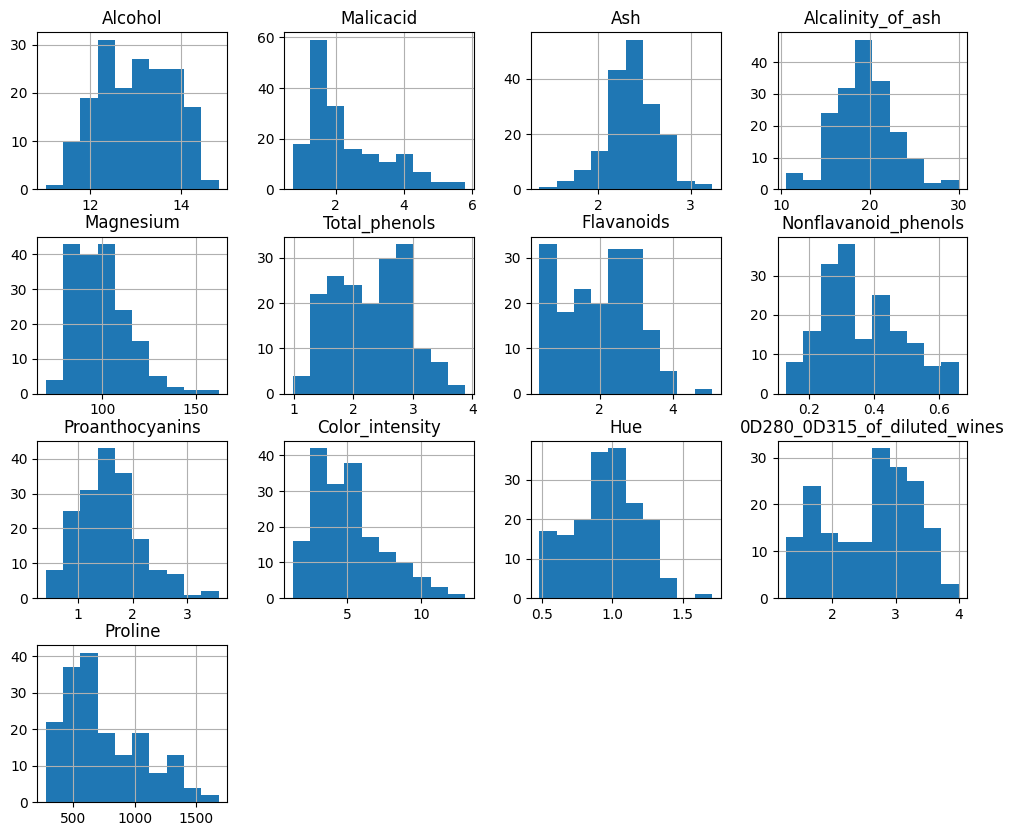

In [ ]:
data.hist(figsize=(12, 10))

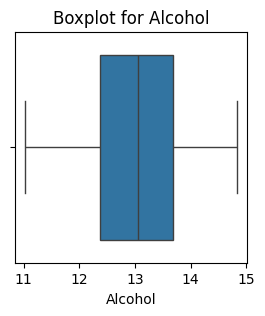

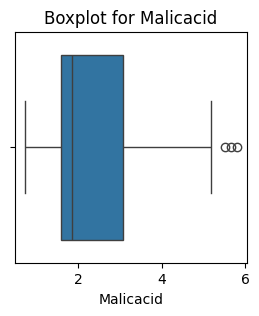

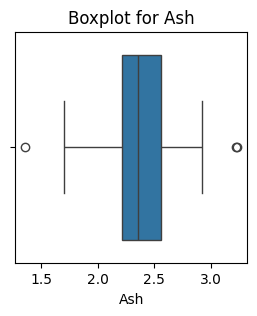

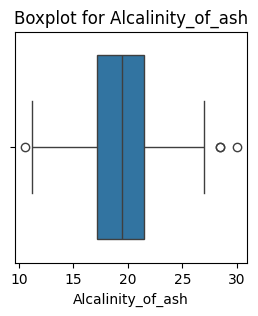

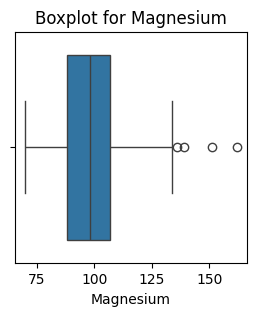

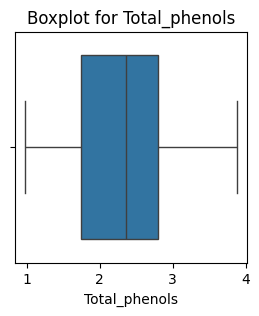

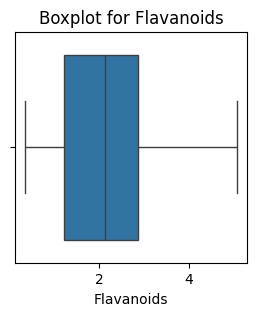

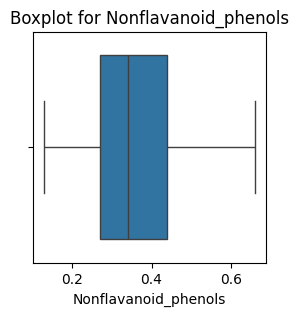

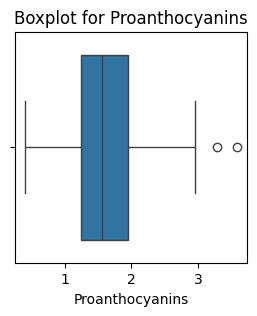

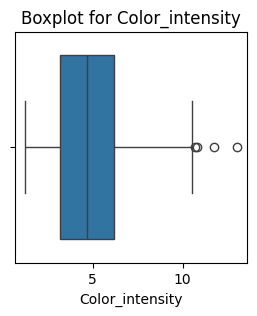

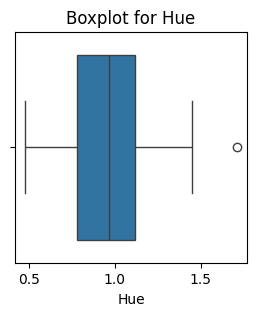

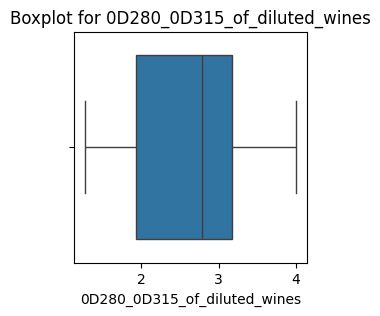

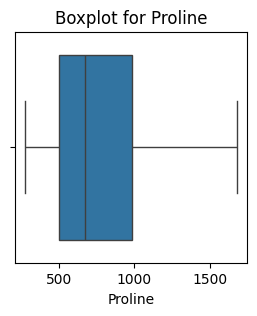

In [ ]:
for column in data.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
# for column in data.columns:
#     sns.boxplot(x=data[column])
#     plt.title(f'Boxplot for {column}')
#     plt.show()

In [ ]:
for feature_name in data.columns.tolist():
  checkStandart(data, feature_name)
  print('\n')

Statistic: 0.0679240105872474, p-value: 0.36769259006904487
Распределение Alcohol близко к нормальному (не отклоняем H0)


Statistic: 0.19127641812672302, p-value: 3.537735764241709e-06
Распределение Malicacid отличается от нормального (отклоняем H0)


Statistic: 0.05845435626074311, p-value: 0.5571921214532858
Распределение Ash близко к нормальному (не отклоняем H0)


Statistic: 0.06349100089114879, p-value: 0.4513193669471598
Распределение Alcalinity_of_ash близко к нормальному (не отклоняем H0)


Statistic: 0.08954340677879147, p-value: 0.10831043703505172
Распределение Magnesium близко к нормальному (не отклоняем H0)


Statistic: 0.0720747777867618, p-value: 0.2989683234886582
Распределение Total_phenols близко к нормальному (не отклоняем H0)


Statistic: 0.085347470796591, p-value: 0.14109584329460456
Распределение Flavanoids близко к нормальному (не отклоняем H0)


Statistic: 0.1148245732192627, p-value: 0.01681700802579033
Распределение Nonflavanoid_phenols отличается от нормаль

In [ ]:
# correlation_matrix = data.corr()
# plt.figure(figsize=(10,6))
# sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
# plt.title('Correlations between Wine data features ')
# plt.show()

Удалим признаки с высоким значением корреляции, чтобы уменьшить размерность данных

In [ ]:
# # Устанавливаем порог корреляции
# threshold = 0.65

# # Получаем матрицу признаков с абсолютными значениями корреляции
# corr_matrix = correlation_matrix.abs()

# # Выбираем только те признаки, у которых корреляция превышает порог, и это не сам с собой (по диагонали)
# high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
#                    if i != j and corr_matrix.loc[i, j] > threshold]
# # Находим признаки, которые нужно удалить (оставляем только один из коррелирующих)
# to_drop = set()
# for i, j in high_corr_pairs:
#     to_drop.add(j)  # Добавляем только второй признак в пару

# # Удаляем выбранные признаки
# data_cleaned = data.drop(columns=to_drop)
# print(f"Удалено {len(to_drop)} признаков: {to_drop}")

# data = data_cleaned

Стандартизируем данные

In [ ]:
# This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
X=pd.DataFrame(SS.fit_transform(data), columns=data.columns)

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


Text(0, 0.5, 'PC2')

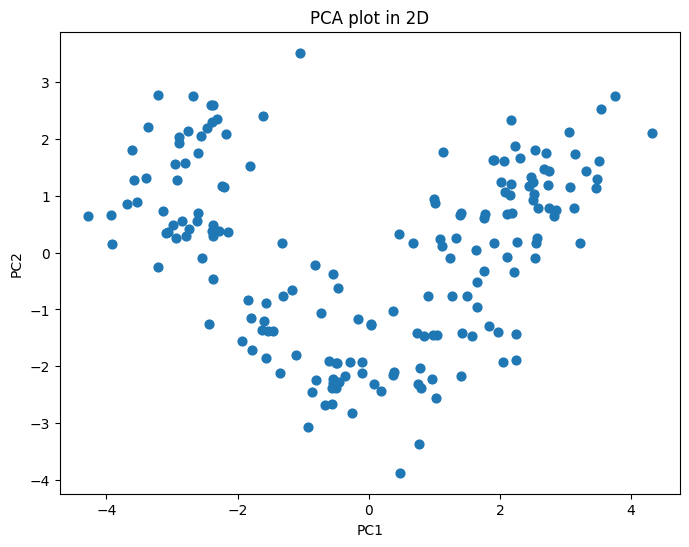

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

Визуально можно предположить наличие сферических кластеров, поэтому был выбран метод K-means
Также исходные данные имеют небольшую размерность и несложную форму кластеров, используем Agglomerative Clustering

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

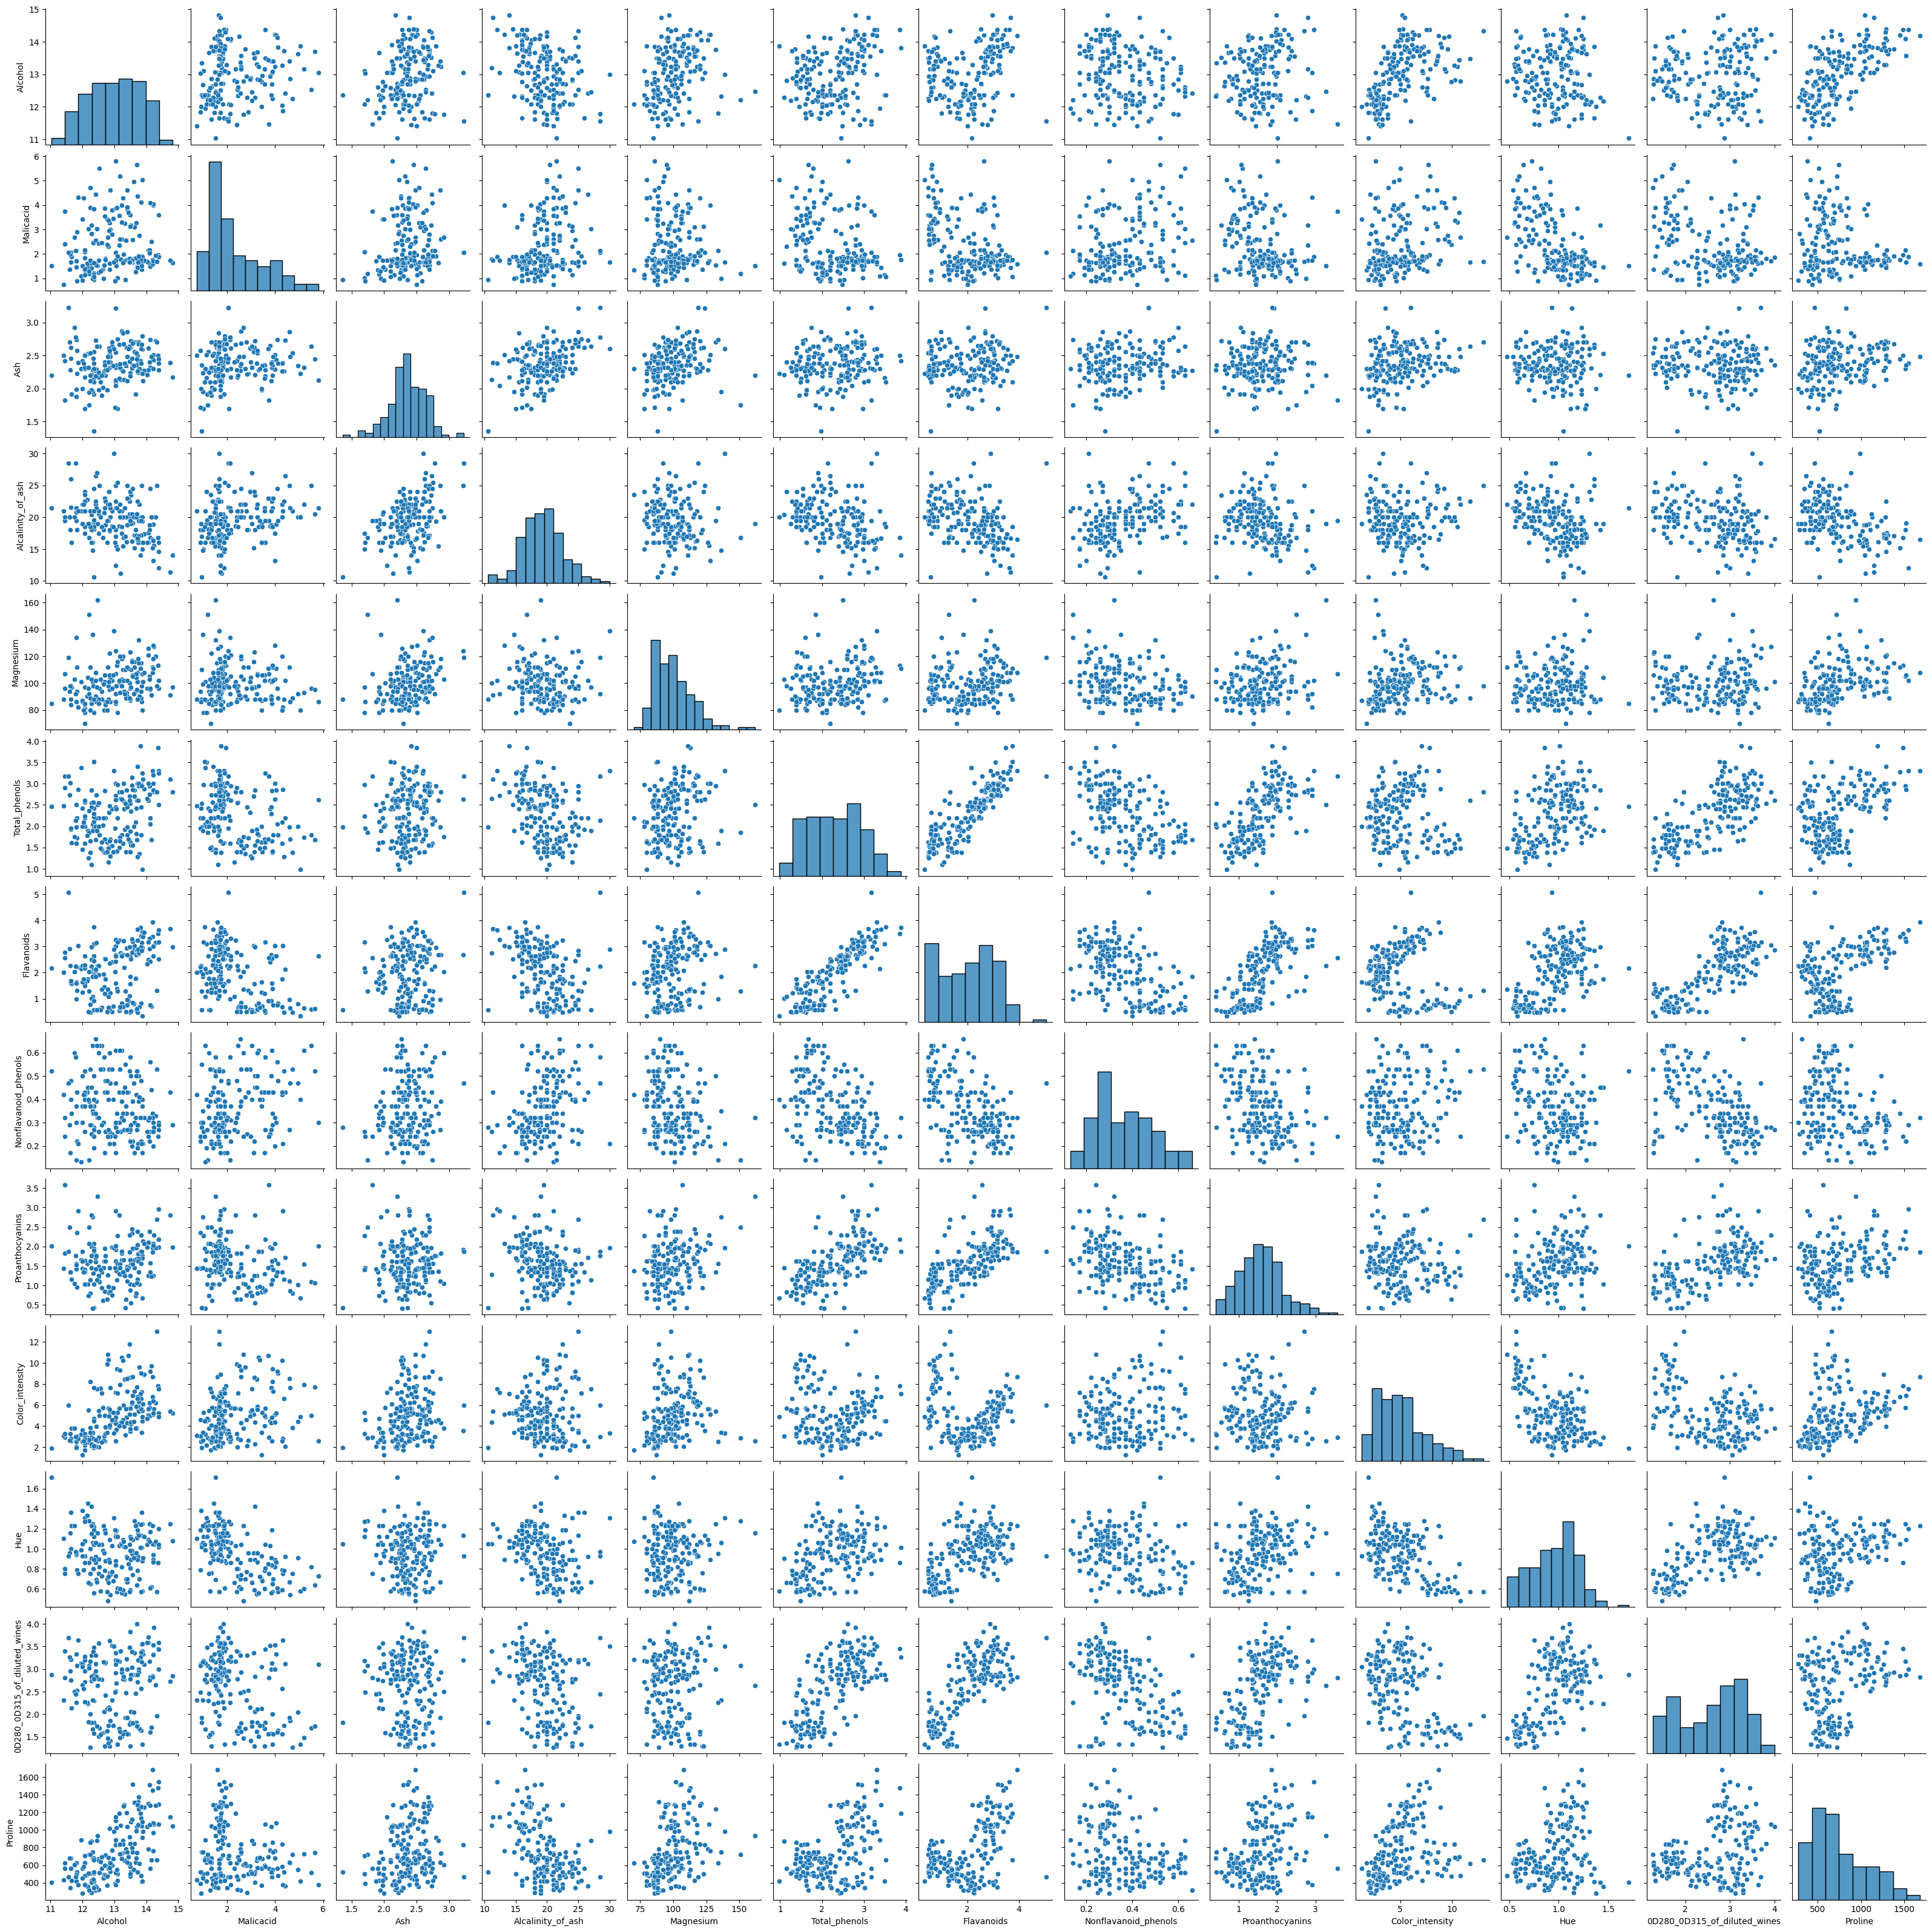

In [ ]:
sns.pairplot(data, palette='viridis')

Заметим излом при количестве кластеров 2-3

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=2)

# Train and make predictions
clusters = kmeans.fit_predict(X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
# KMeans
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters)

# Train and make predictions
clusters = kmeans.fit_predict(X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


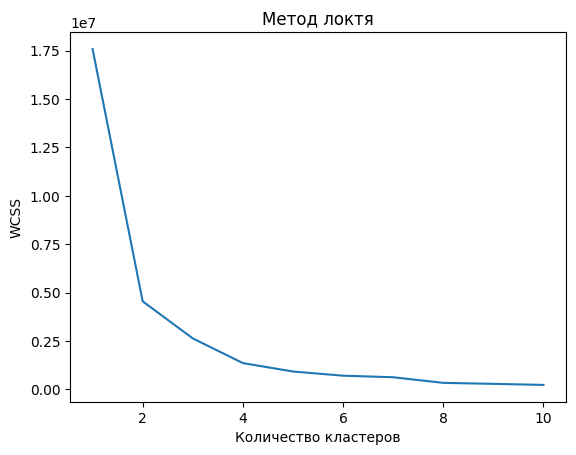

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Метод локтя для выбора числа кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'PC2')

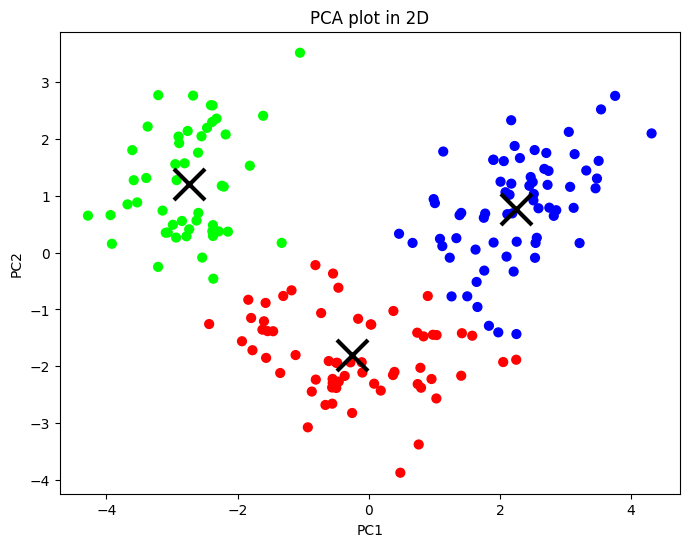

In [ ]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [ ]:
# Создание DataFrame с метками кластеров
X_clustered = X.copy()  # Скопируйте данные X
X_clustered['Cluster'] = clusters  # Добавьте метки кластеров

In [ ]:
X_clustered

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score

print("Отделимость:\n", pairwise_distances(centroids))
print("Матрица расстояний между центроидами кластеров:\n", euclidean_distances(centroids))
print(f"Внутрикластерное расстояние: {kmeans.inertia_}")
print(f"Компактность кластеров: {davies_bouldin_score(X, clusters)}")
print(f"ARI: {adjusted_rand_score(y.values.ravel(), clusters)}")
print(f"Наполненность кластеров: {np.bincount(clusters)}")
print(f"Силуэтный коэффициент: {silhouette_score(X, clusters)}") # силуэтная диаграмма, отделимость, компакноть, ари, среднее значение силуэта, наполненность, категоризованные диаграмммы по исходным признакам, значимость признаков

Отделимость:
 [[0.         3.60264953 5.0234609 ]
 [3.60264953 0.         3.92705677]
 [5.0234609  3.92705677 0.        ]]
Матрица расстояний между центроидами кластеров:
 [[0.         3.60264953 5.0234609 ]
 [3.60264953 0.         3.92705677]
 [5.0234609  3.92705677 0.        ]]
Внутрикластерное расстояние: 223075.33371428665
Компактность кластеров: 1.393136248943783
ARI: 0.8456161913329393
Наполненность кластеров: [67 62 49]
Силуэтный коэффициент: 0.2806817957373884


Все расстояния между кластерами находятся в диапазоне 3.30–3.45, что говорит о некоторой разделённости, но не о полной изоляции кластеров.
Если расстояния были бы гораздо выше, это указывало бы на лучшую разделённость кластеров.<br><br>
Значение компактности кластеров 1.326 говорит о том, что кластеры имеют умеренное перекрытие. Для хорошей кластеризации DBI часто ниже 1.
Если значение превышает 1, это может указывать на недостаточную чёткость кластеров или их плохую отделённость.<br><br>
Значение силуэтного коэффициента указывает на слабую кластеризацию с возможным перекрытием кластеров

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

baseline_inertia = kmeans.inertia_
feature_importance = []

for i in range(X.shape[1]):
    reduced_data = np.delete(X, i, axis=1)
    kmeans_reduced = KMeans(n_clusters=3, random_state=42).fit(reduced_data)

    reduced_labels = kmeans_reduced.labels_
    reduced_davies_bouldin = davies_bouldin_score(reduced_data, reduced_labels)
    feature_importance.append(reduced_davies_bouldin)

# Создание таблицы с названиями признаков и их значимостью
importance_table = pd.DataFrame({
    'Признак': X.columns.tolist(),
    'Значимость по индексу Болдуина': feature_importance
})


# Сортировка таблицы по значимости
importance_table = importance_table.sort_values(by='Значимость по индексу Болдуина', ascending=False)

# Вывод таблицы
print(importance_table)


                         Признак  Значимость по индексу Болдуина
12                       Proline                        1.490394
0                        Alcohol                        1.468845
9                Color_intensity                        1.422342
6                     Flavanoids                        1.414873
11  0D280_0D315_of_diluted_wines                        1.400403
10                           Hue                        1.375064
5                  Total_phenols                        1.370760
4                      Magnesium                        1.352355
3              Alcalinity_of_ash                        1.333863
1                      Malicacid                        1.332909
8                Proanthocyanins                        1.332660
7           Nonflavanoid_phenols                        1.331127
2                            Ash                        1.316809


In [ ]:
from sklearn.metrics import adjusted_rand_score

baseline_labels = kmeans.labels_
importance_scores = []

for i in range(X.shape[1]):
    reduced_data = np.delete(X, i, axis=1)
    kmeans_reduced = KMeans(n_clusters=3, random_state=42).fit(reduced_data)
    ari_score = adjusted_rand_score(baseline_labels, kmeans_reduced.labels_)
    importance_scores.append(ari_score)



# Создание таблицы с названиями признаков и их значимостью
importance_table = pd.DataFrame({
    'Признак': X.columns.tolist(),
    'Значимость признаков (ARI)': importance_scores
})

# Сортировка таблицы по значимости
importance_table = importance_table.sort_values(by='Значимость признаков (ARI)', ascending=False)

# Вывод таблицы
print(importance_table)

                         Признак  Значимость признаков (ARI)
5                  Total_phenols                    0.170936
8                Proanthocyanins                    0.169520
10                           Hue                    0.169419
6                     Flavanoids                    0.168833
1                      Malicacid                    0.166580
7           Nonflavanoid_phenols                    0.164382
11  0D280_0D315_of_diluted_wines                    0.162343
2                            Ash                    0.158759
9                Color_intensity                    0.153727
0                        Alcohol                    0.151980
4                      Magnesium                    0.149951
3              Alcalinity_of_ash                    0.149492
12                       Proline                    0.133146


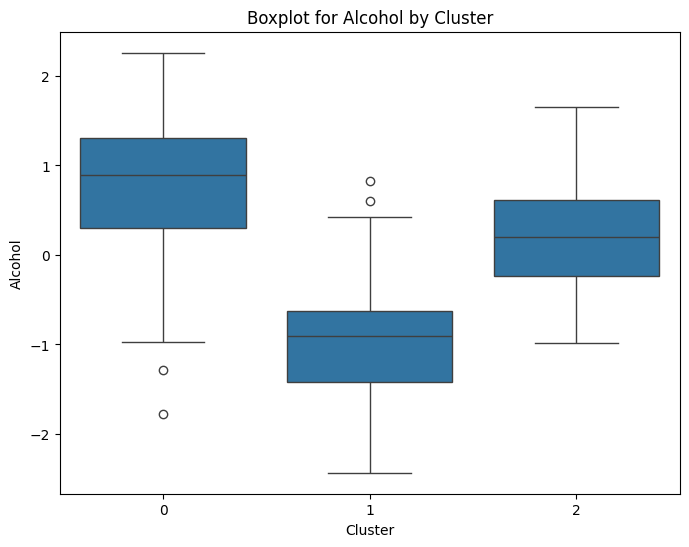

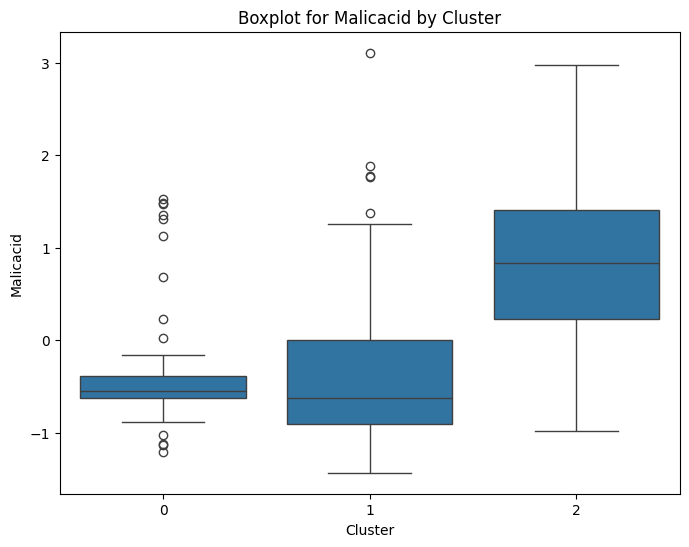

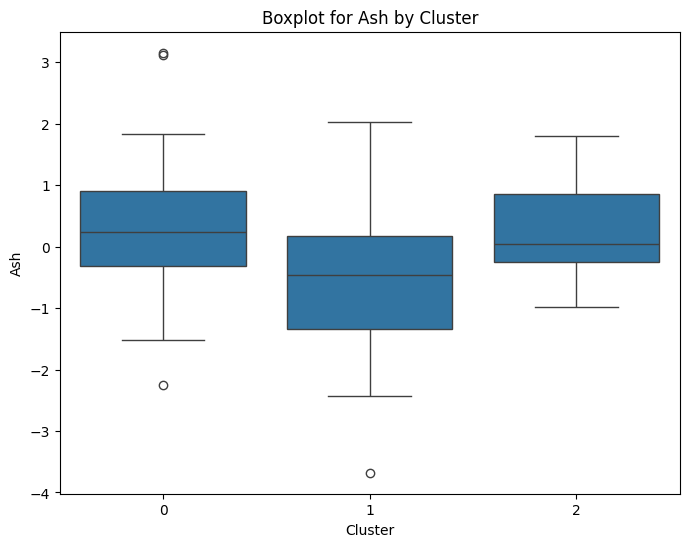

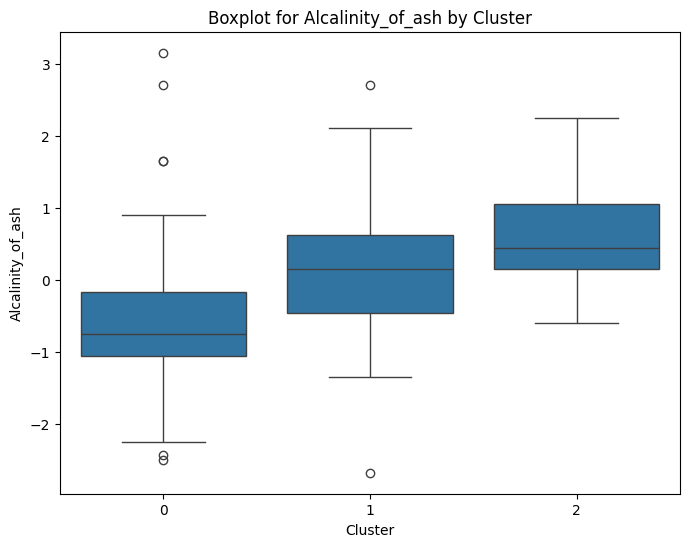

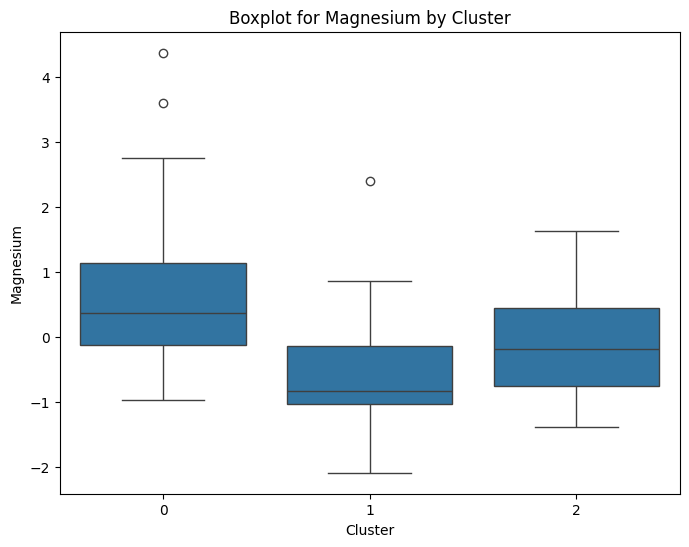

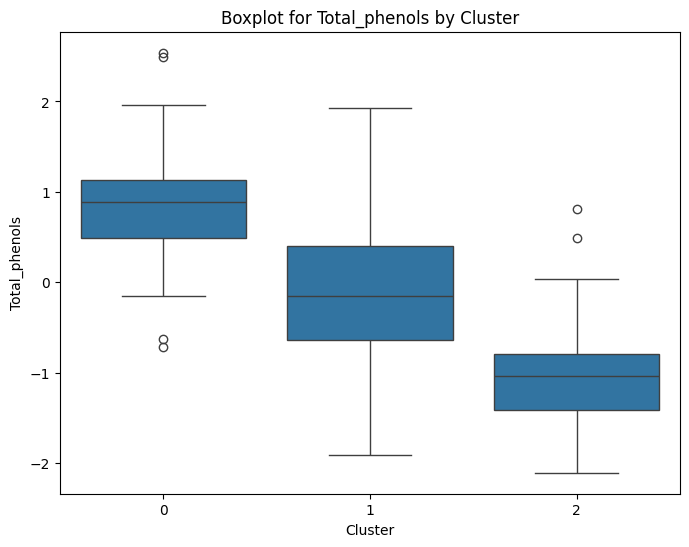

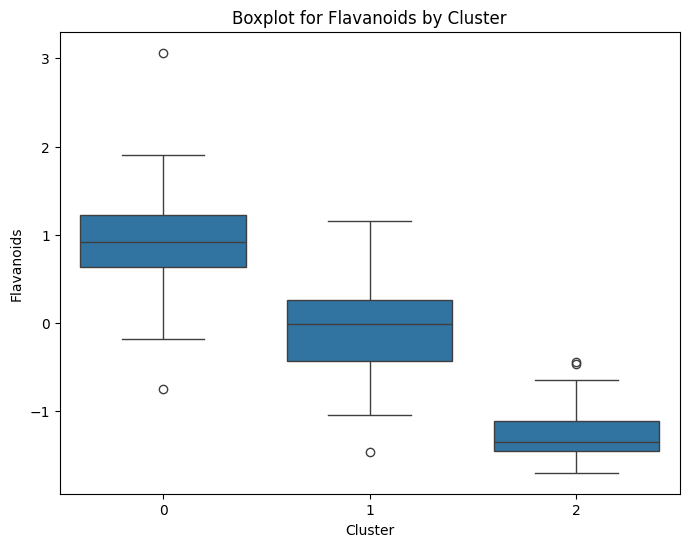

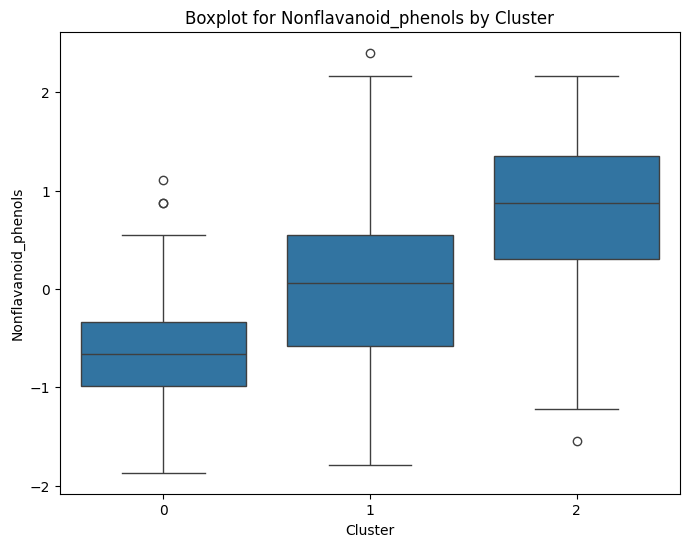

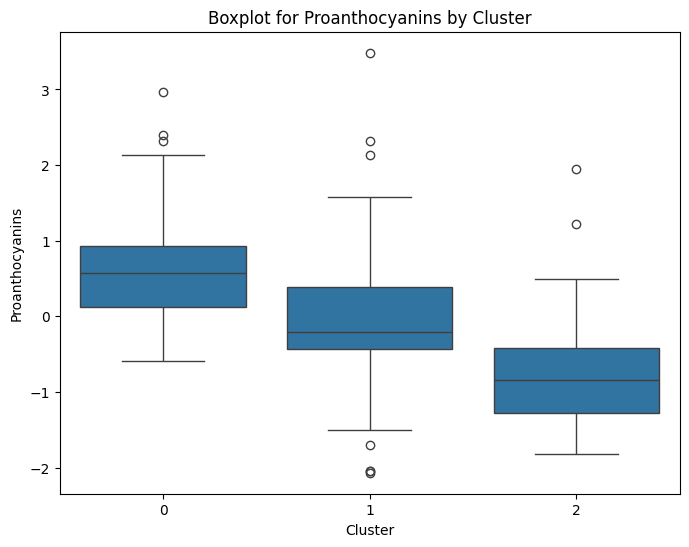

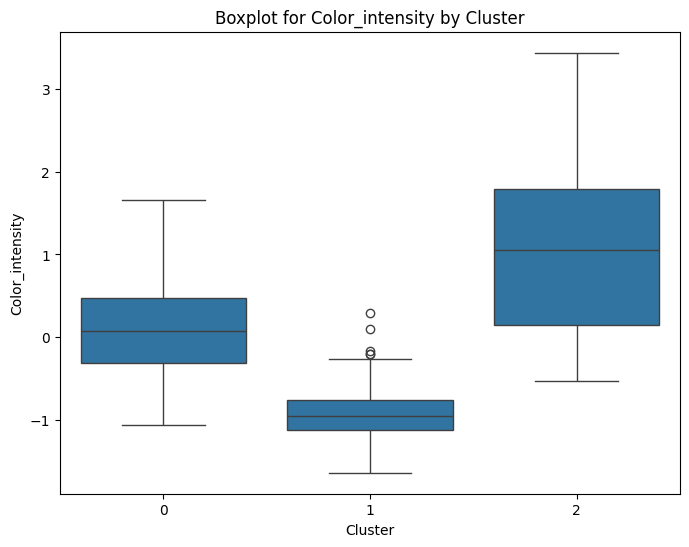

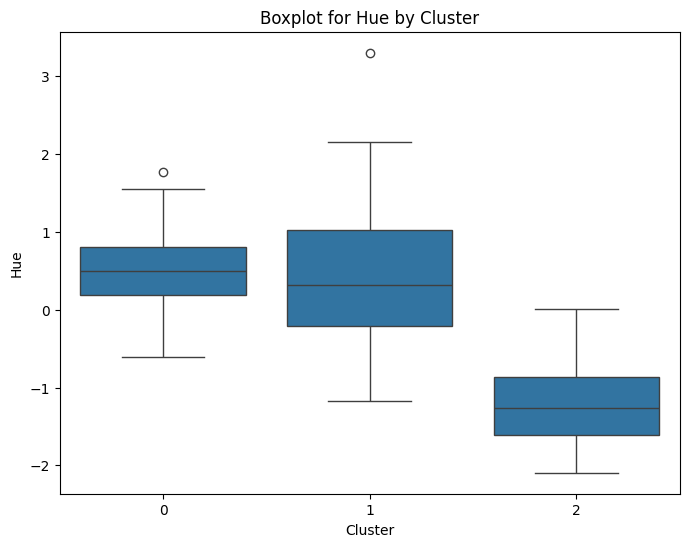

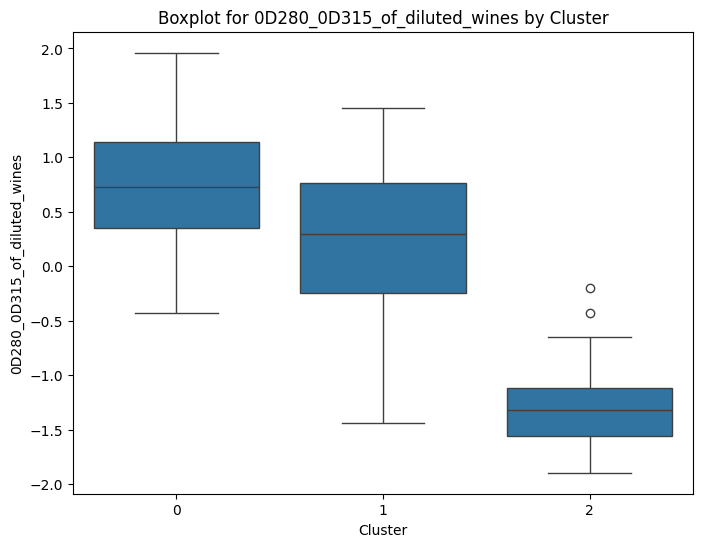

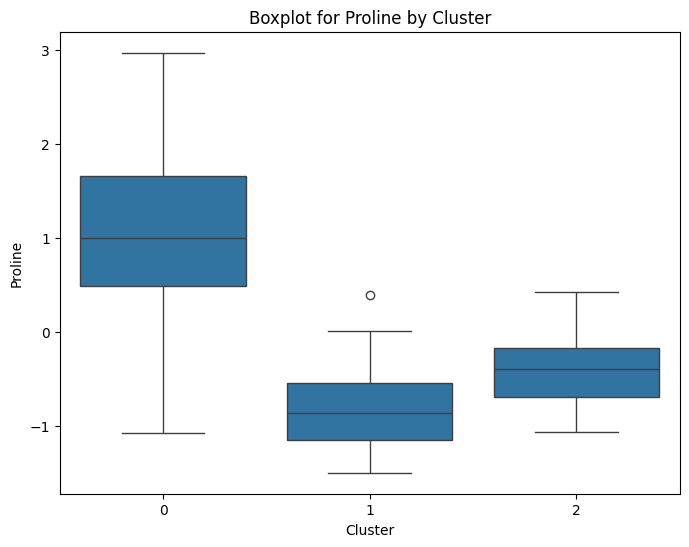

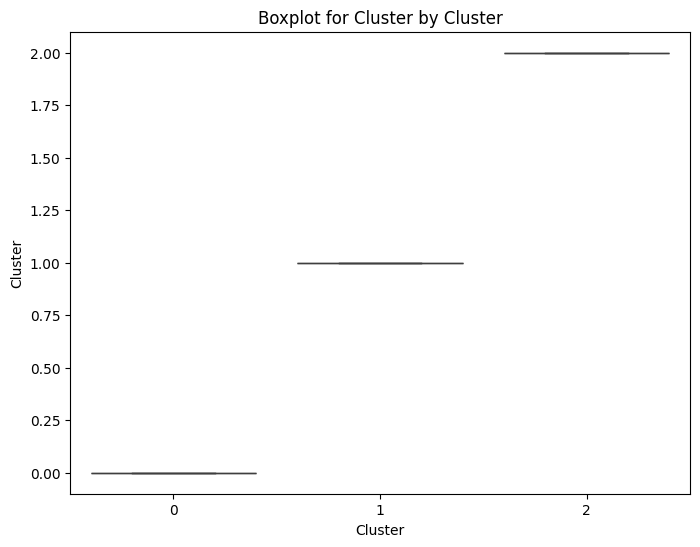

In [ ]:

# Построение boxplot для каждого признака по кластерам
for column in X_clustered.columns:  # Исключаем колонку Cluster
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=X_clustered)
    plt.title(f'Boxplot for {column} by Cluster')
    plt.show()

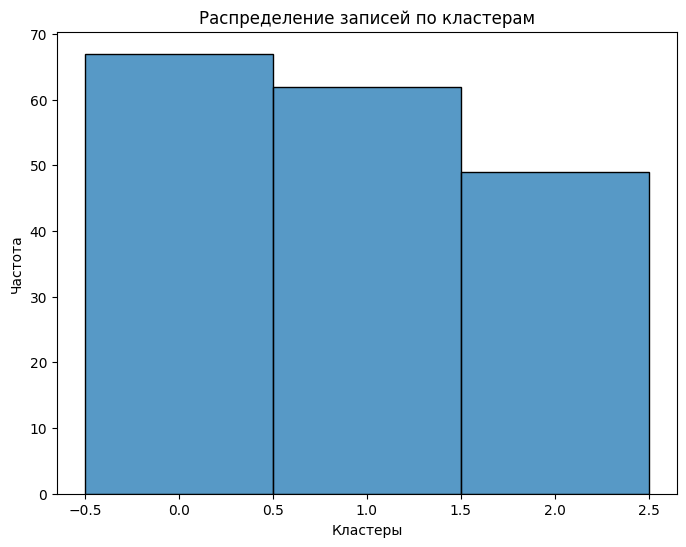

In [ ]:
# Гистограмма для распределения записей по кластерам
plt.figure(figsize=(8, 6))
sns.histplot(X_clustered['Cluster'], kde=False, bins=len(set(clusters)), discrete=True)
plt.title('Распределение записей по кластерам')
plt.xlabel('Кластеры')
plt.ylabel('Частота')
plt.show()

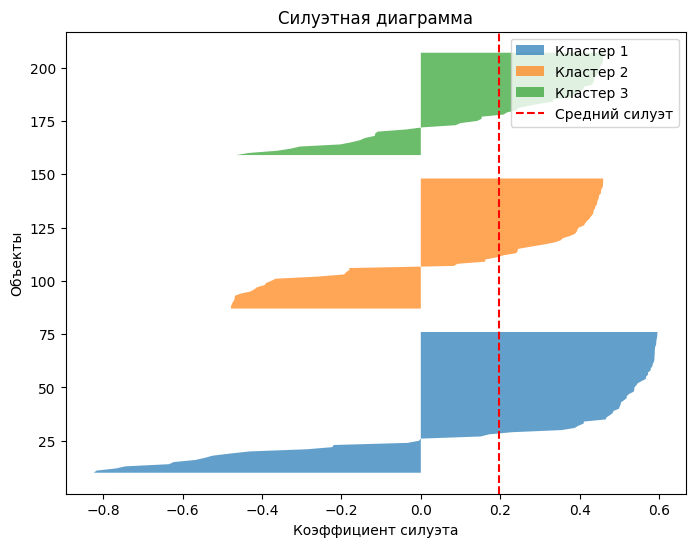

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Рассчёт коэффициентов силуэта
silhouette_vals = silhouette_samples(data, clusters)
silhouette_avg = silhouette_score(data, clusters)

# Построение силуэтной диаграммы
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7,
        label=f'Кластер {i+1}'
    )
    y_lower = y_upper + 10  # Интервал между кластерами

# Вертикальная линия для среднего значения силуэта
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Средний силуэт")
plt.title("Силуэтная диаграмма")
plt.xlabel("Коэффициент силуэта")
plt.ylabel("Объекты")
plt.legend()
plt.show()

Силуэтная диаграмма демонстрирует качество кластеризации, оценивая плотность и разделимость кластеров на основе коэффициентов силуэта для каждого объекта. Коэффициент силуэта варьируется от -1 до 1 и показывает, насколько хорошо объект принадлежит своему кластеру:

Положительные значения (близкие к 1) указывают на хорошую принадлежность объекта своему кластеру и значительное расстояние до ближайшего соседнего кластера. В нашем графике большинство объектов имеют положительные коэффициенты, что свидетельствует о приемлемом разбиении данных.

Отрицательные значения указывают на плохую принадлежность объекта своему кластеру, так как расстояние до другого кластера меньше, чем до собственного. Небольшое количество таких объектов может быть свидетельством пересечения кластеров.

Красная пунктирная линия визуализирует среднее качество кластеризации. В данном случае линия показывает значение около 0.2, что говорит о том, что кластеры умеренно различимы, но могли бы быть лучше сегментированы.


In [ ]:
X.shape

(178, 13)

Параметры

In [ ]:
# Настройка модели агломеративной кластеризации
model = AgglomerativeClustering(n_clusters = 3, linkage='ward')

# Применение кластеризации
clusters = model.fit_predict(X)


In [ ]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X, clusters)

centroids = clf.centroids_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

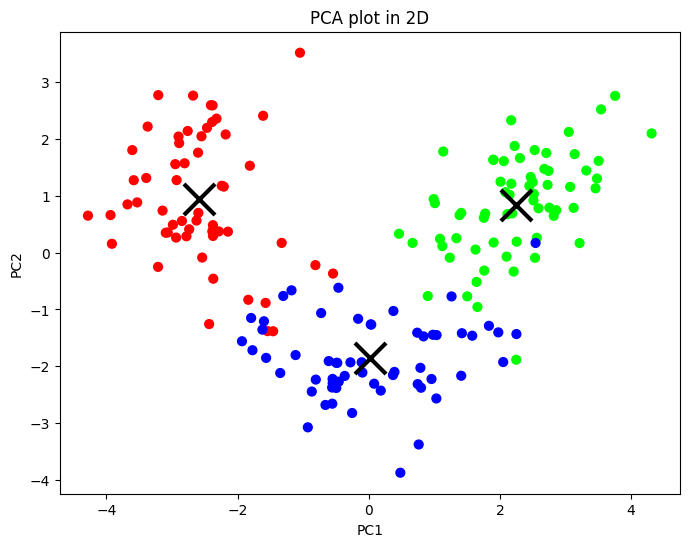

In [ ]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
# Создание DataFrame с метками кластеров
X_clustered = X.copy()  # Скопируйте данные X
X_clustered['Cluster'] = clusters  # Добавьте метки кластеров

In [ ]:
X_clustered

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1


In [ ]:
print("Отделимость:\n", pairwise_distances(centroids))
print("Матрица расстояний между центроидами кластеров:\n", euclidean_distances(centroids))
print(f"Компактность кластеров: {davies_bouldin_score(X, clusters)}")
print(f"ARI: {adjusted_rand_score(y.values.ravel(), clusters)}")
print(f"Наполненность кластеров: {np.bincount(clusters)}")
print(f"Силуэтный коэффициент: {silhouette_score(X, clusters)}") # силуэтная диаграмма, отделимость, компакноть, ари, среднее значение силуэта, наполненность, категоризованные диаграмммы по исходным признакам, значимость признаков


Отделимость:
 [[0.         3.86668193 3.54476737]
 [3.86668193 0.         4.85242786]
 [3.54476737 4.85242786 0.        ]]
Матрица расстояний между центроидами кластеров:
 [[0.         3.86668193 3.54476737]
 [3.86668193 0.         4.85242786]
 [3.54476737 4.85242786 0.        ]]
Компактность кластеров: 1.4185919431857326
ARI: 0.7899332213582837
Наполненность кластеров: [58 56 64]
Силуэтный коэффициент: 0.2774439826952265


Расстояние между двумя кластерами от 3 до 3.35, что говорит о чёткой разделённости.<br><br>
Суммарное расстояние точек от центроидов значительно уменьшилось по сравнению с предыдущими результатами (~939).
Это указывает на улучшение компактности кластеров: точки стали ближе к своим центрам.<br><br>
Индекс Дэвиса-Болдина немного выше предыдущего значения (1.326), что может указывать на увеличение плотности или уменьшение расстояния между кластерами.Значение меньше 1, что говорит о компактности кластеров

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd

# Модель с полным набором признаков
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust.fit(X)
baseline_labels = agg_clust.labels_
baseline_davies_bouldin = davies_bouldin_score(X, baseline_labels)  # или любая другая метрика

# Список значимостей признаков
feature_importance = []

# Для каждого признака
for i in range(X.shape[1]):
    reduced_data = np.delete(X, i, axis=1)  # Удаление признака
    agg_clust_reduced = AgglomerativeClustering(n_clusters=3)
    agg_clust_reduced.fit(reduced_data)
    reduced_labels = agg_clust_reduced.labels_
    reduced_davies_bouldin = davies_bouldin_score(reduced_data, reduced_labels)

    # Измеряем разницу в качестве кластеризации
    importance = baseline_davies_bouldin - reduced_davies_bouldin
    feature_importance.append(importance)

# Создание таблицы значимости признаков
importance_table = pd.DataFrame({
    'Признак': X.columns.tolist(),
    'Значимость': feature_importance
})

# Сортировка по значимости
importance_table = importance_table.sort_values(by='Значимость', ascending=False)

# Вывод таблицы
print(importance_table)


                         Признак  Значимость
3              Alcalinity_of_ash    0.082989
2                            Ash    0.081302
10                           Hue    0.050604
5                  Total_phenols    0.048780
7           Nonflavanoid_phenols    0.047865
4                      Magnesium    0.036151
1                      Malicacid    0.030465
6                     Flavanoids   -0.018991
8                Proanthocyanins   -0.020257
11  0D280_0D315_of_diluted_wines   -0.051353
0                        Alcohol   -0.068359
9                Color_intensity   -0.086011
12                       Proline   -0.113193


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Модель с полным набором признаков
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust.fit(X)
baseline_labels = agg_clust.labels_

importance_scores = []

# Для каждого признака
for i in range(X.shape[1]):
    reduced_data = np.delete(X, i, axis=1)  # Удаляем признак
    agg_clust_reduced = AgglomerativeClustering(n_clusters=3)
    agg_clust_reduced.fit(reduced_data)
    ari_score = adjusted_rand_score(baseline_labels, agg_clust_reduced.labels_)
    importance_scores.append(ari_score)

# Создание таблицы с названиями признаков и их значимостью
importance_table = pd.DataFrame({
    'Признак': X.columns.tolist(),
    'Значимость признаков (ARI)': importance_scores
})

# Сортировка таблицы по значимости
importance_table = importance_table.sort_values(by='Значимость признаков (ARI)', ascending=False)

# Вывод таблицы
print(importance_table)


                         Признак  Значимость признаков (ARI)
11  0D280_0D315_of_diluted_wines                    0.950249
1                      Malicacid                    0.919808
5                  Total_phenols                    0.916135
9                Color_intensity                    0.886195
3              Alcalinity_of_ash                    0.884838
6                     Flavanoids                    0.884528
10                           Hue                    0.854147
0                        Alcohol                    0.839289
7           Nonflavanoid_phenols                    0.827031
8                Proanthocyanins                    0.808407
2                            Ash                    0.771700
12                       Proline                    0.702743
4                      Magnesium                    0.593380


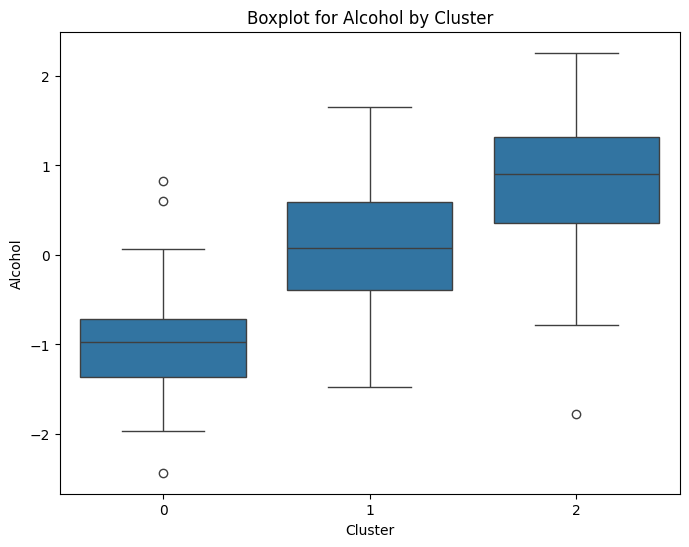

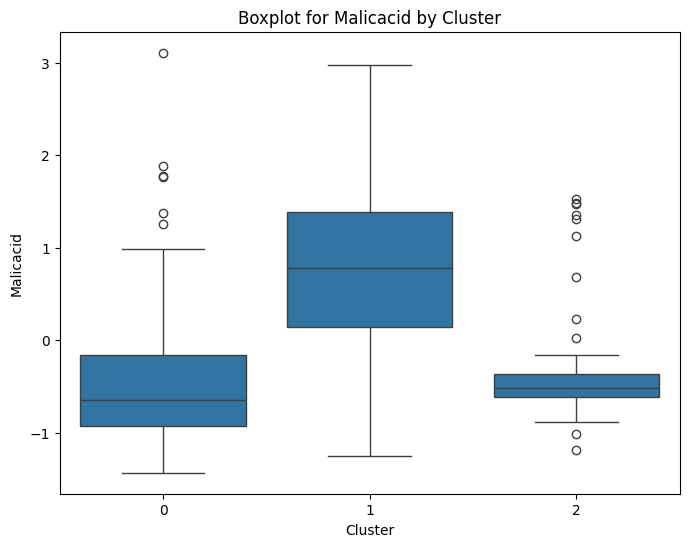

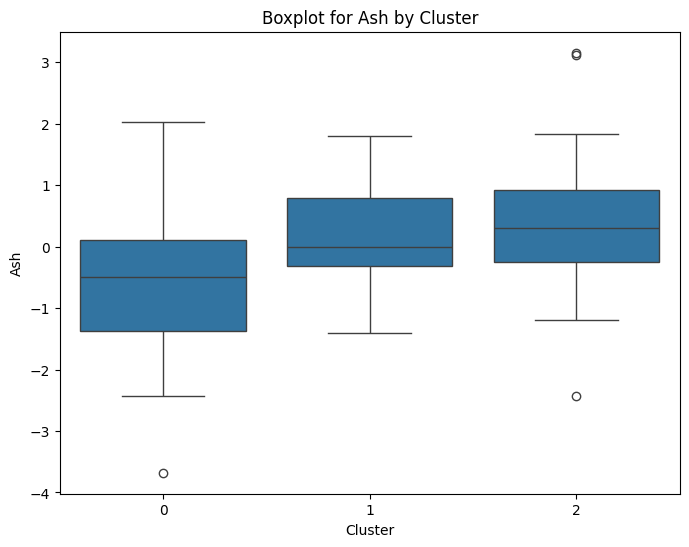

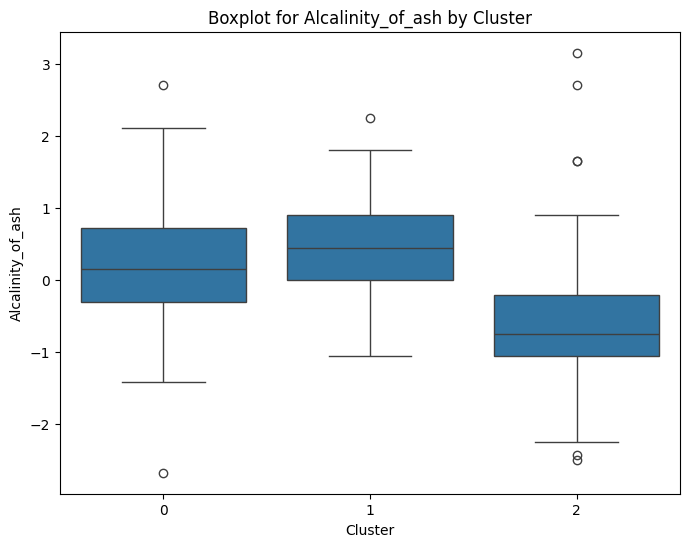

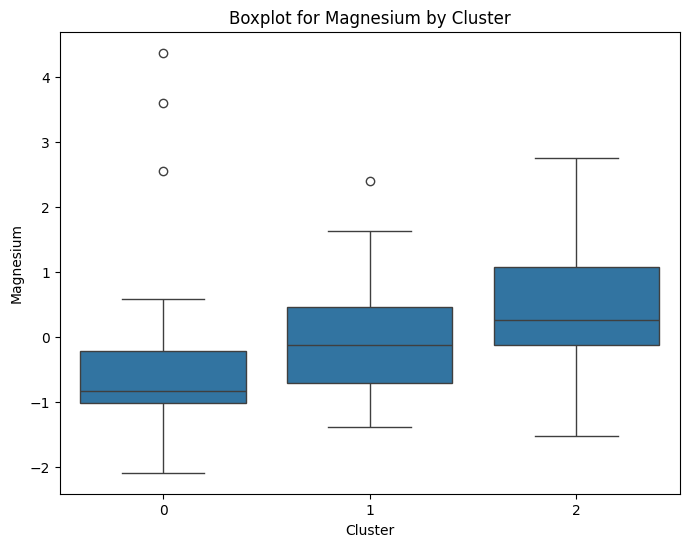

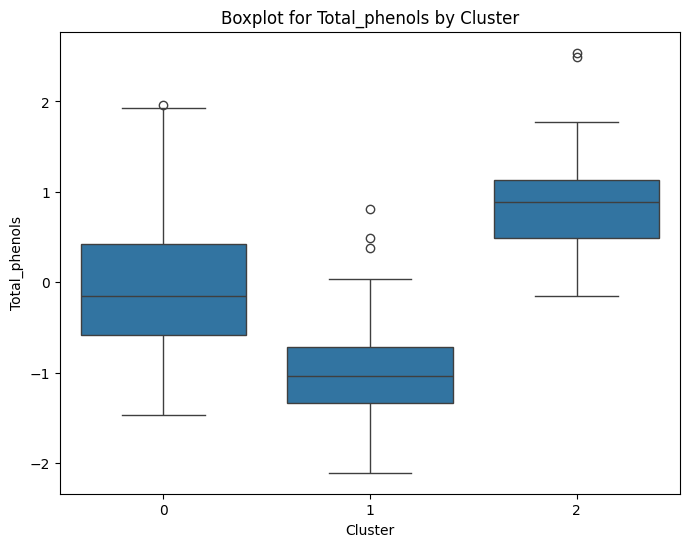

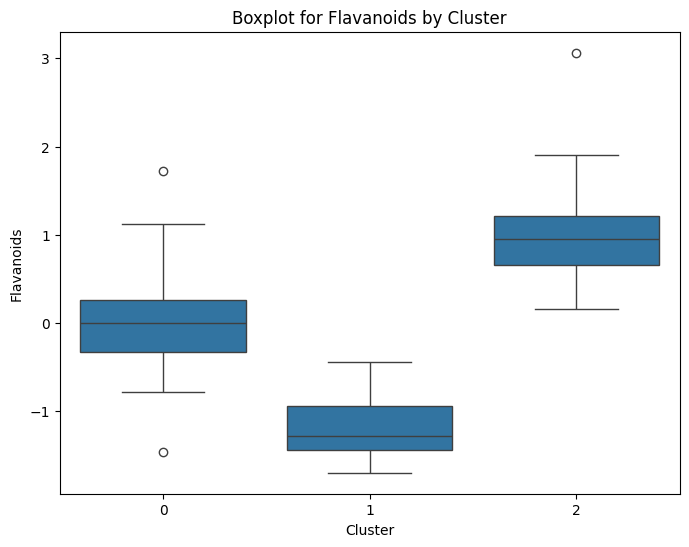

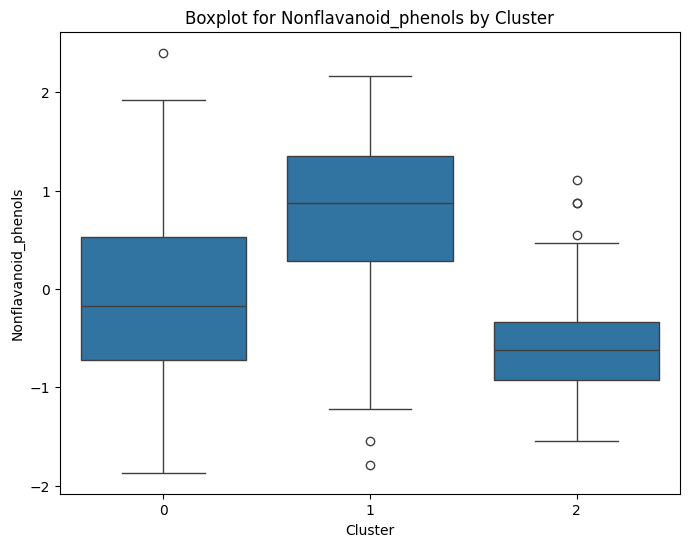

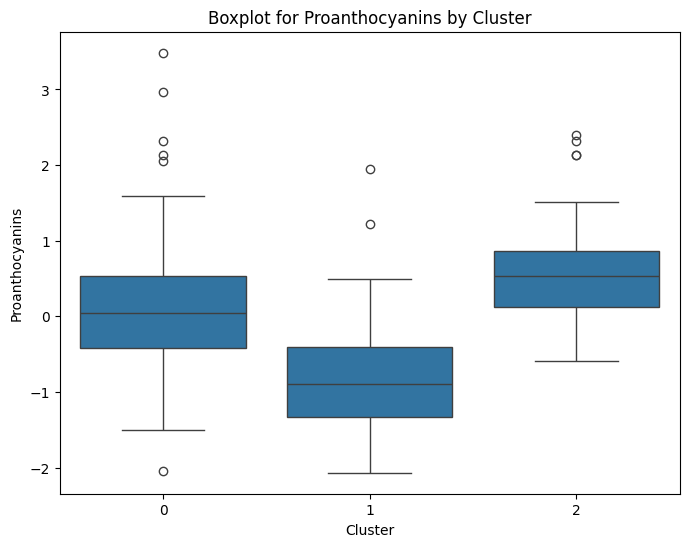

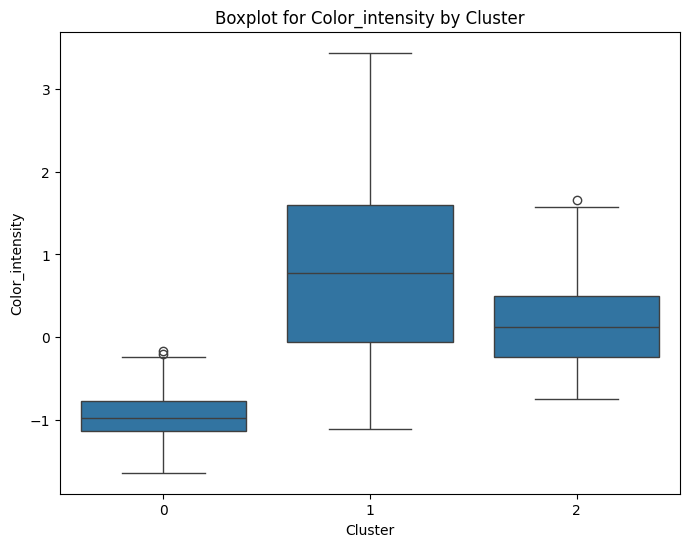

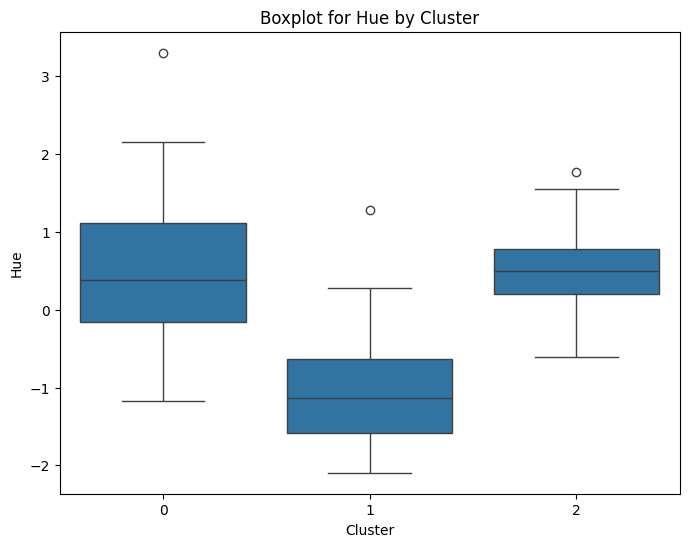

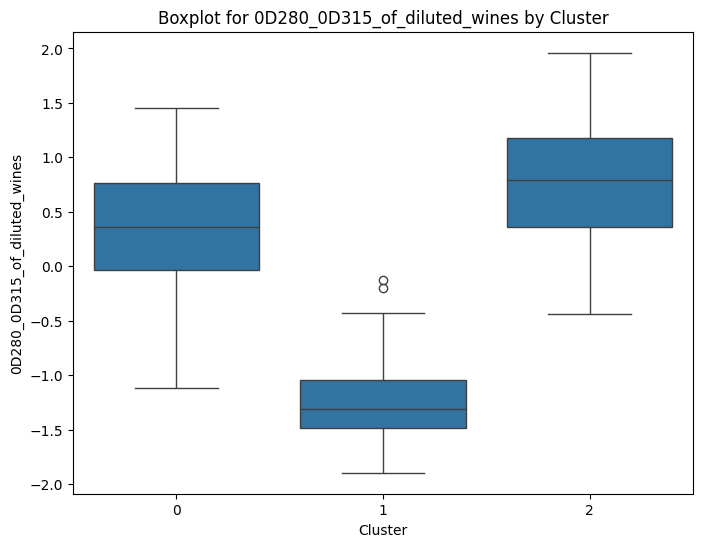

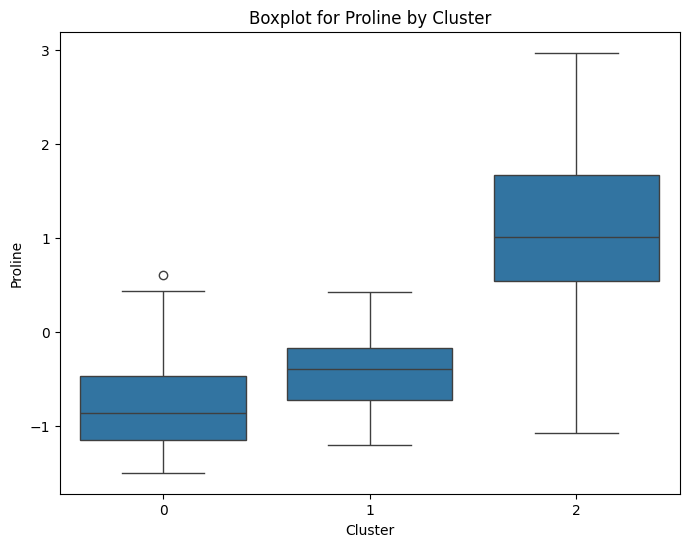

In [ ]:

# Построение boxplot для каждого признака по кластерам
for column in X_clustered.columns[:-1]:  # Исключаем колонку Cluster
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=X_clustered)
    plt.title(f'Boxplot for {column} by Cluster')
    plt.show()

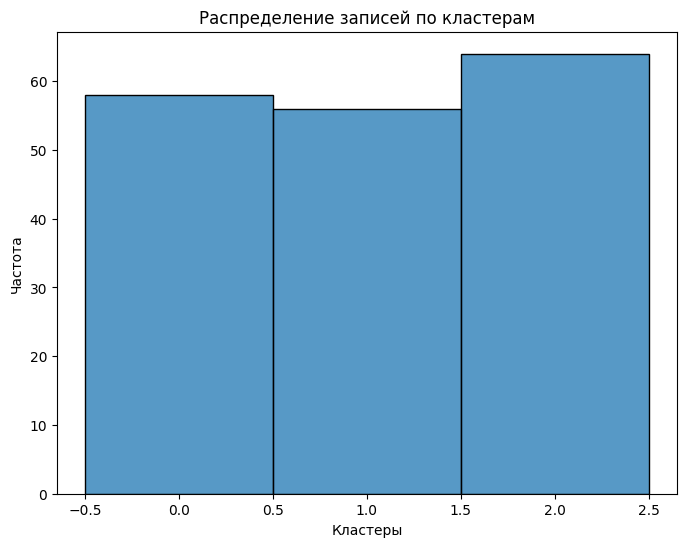

In [ ]:
# Гистограмма для распределения записей по кластерам
plt.figure(figsize=(8, 6))
sns.histplot(X_clustered['Cluster'], kde=False, bins=len(set(clusters)), discrete=True)
plt.title('Распределение записей по кластерам')
plt.xlabel('Кластеры')
plt.ylabel('Частота')
plt.show()

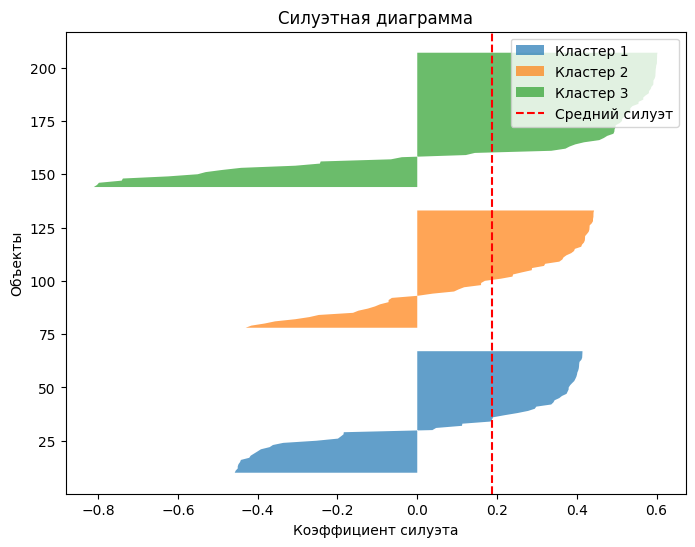

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Рассчёт коэффициентов силуэта
silhouette_vals = silhouette_samples(data, clusters)
silhouette_avg = silhouette_score(data, clusters)

# Построение силуэтной диаграммы
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7,
        label=f'Кластер {i+1}'
    )
    y_lower = y_upper + 10  # Интервал между кластерами

# Вертикальная линия для среднего значения силуэта
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Средний силуэт")
plt.title("Силуэтная диаграмма")
plt.xlabel("Коэффициент силуэта")
plt.ylabel("Объекты")
plt.legend()
plt.show()

Кластер 1: Большинство объектов имеют положительные коэффициенты силуэта, но они относительно низкие. Это говорит о том, что объекты в этом кластере, возможно, не очень плотно сгруппированы или есть некоторые объекты, которые могли бы быть классифицированы иначе.

Кластер 2: Объекты в этом кластере имеют самые высокие коэффициенты силуэта. Это означает, что они хорошо разделены от других кластеров и внутри кластера объекты достаточно похожи друг на друга.

Кластер 3: Похожая ситуация, как и в кластере 1. Есть объекты с высокими коэффициентами силуэта, но в целом значения ниже, чем в кластере 2.

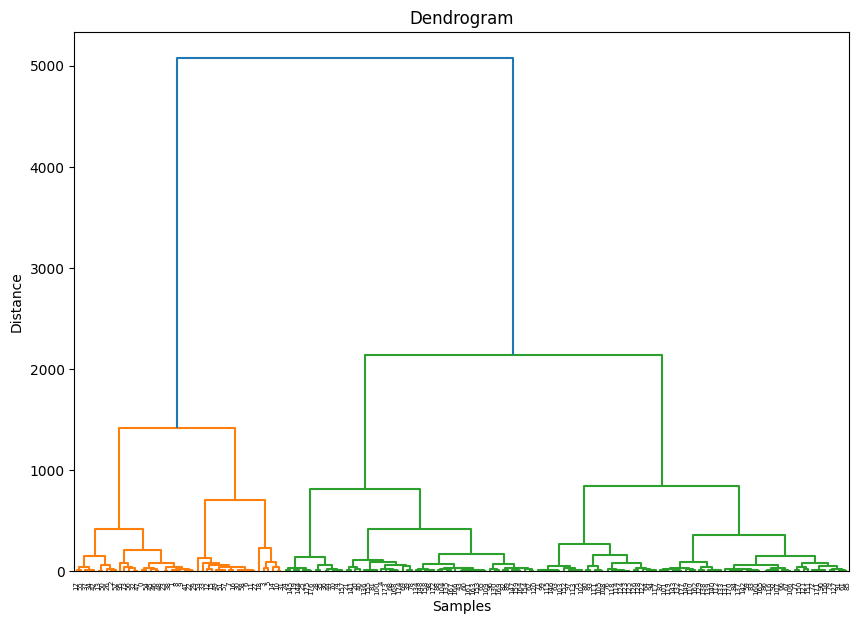

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Построение матрицы связей
Z = linkage(data, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

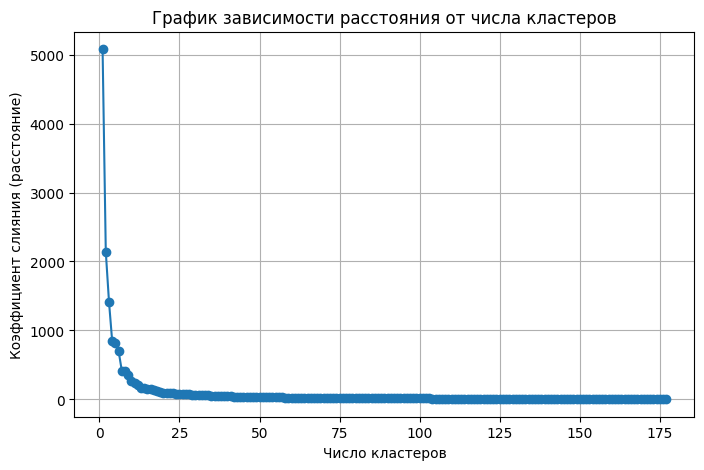

In [ ]:
# Извлечение коэффициентов слияния (дистанции)
merge_distances = Z[:, 2]

# Генерация графика
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(merge_distances) + 1), merge_distances[::-1], marker='o')
plt.title('График зависимости расстояния от числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Коэффициент слияния (расстояние)')
plt.grid()
plt.show()

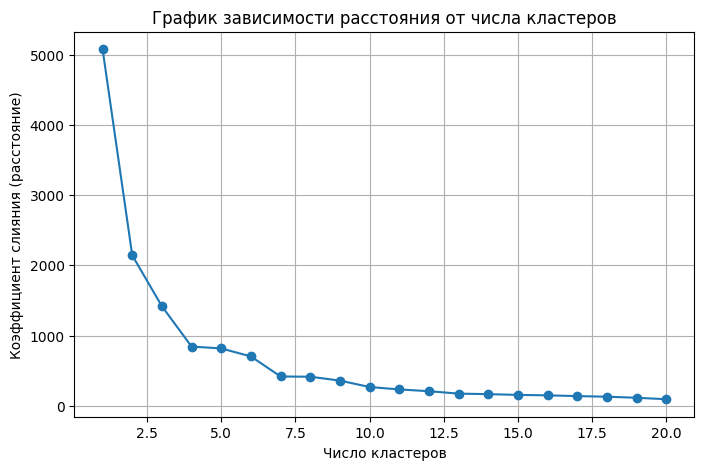

In [ ]:
# Извлечение коэффициентов слияния (дистанции)
merge_distances = Z[:, 2]

plot_clusters = 20
# Генерация графика
plt.figure(figsize=(8, 5))
plt.plot(range(1, plot_clusters+1), merge_distances[::-1][:plot_clusters], marker='o')
plt.title('График зависимости расстояния от числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Коэффициент слияния (расстояние)')
plt.grid()
plt.show()

На графике отчетливо видно "колено" на уровне примерно 3 кластеров. Это место, где резкое снижение коэффициента слияния замедляется, а график становится более пологим.
Данная точка обычно интерпретируется как оптимальное количество кластеров, поскольку дальнейшее увеличение числа кластеров не приводит к значительному уменьшению расстояний между ними.

Основные параметры метода AgglomerativeClustering
<ul>
<li> n_clusters (default=2)

Число кластеров, на которые необходимо разбить данные.

<li> metric (default='euclidean')

Мера расстояния между объектами.
Возможные значения:
'euclidean': Евклидово расстояние.
'l1': Манхэттенское расстояние.
'l2': Евклидово расстояние (то же, что и 'euclidean').
'manhattan': Манхэттенское расстояние (то же, что 'l1').
'cosine': Косинусное расстояние.
'precomputed': Предварительно рассчитанная матрица расстояний.
Если выбран linkage='ward', обязательно использовать 'euclidean'.

<li> memory (default=None)

Используется для кэширования промежуточных вычислений.

<li> connectivity (default=None)

Матрица, определяющая, какие объекты связаны друг с другом.
Используется для учета топологических ограничений, например, кластеризация соседей на графе.

<li> compute_full_tree (default='auto')

Определяет, будет ли построено полное дерево кластеризации.
Значения:
True: Полное дерево всегда строится.
False: Полное дерево не строится, если указано n_clusters.
'auto': Полное дерево строится, только если n_clusters меньше, чем логарифм от числа объектов.

<li> linkage (default='ward')

Метод объединения кластеров.
Возможные значения:
'ward': Минимизирует увеличение внутрикластерной дисперсии (требует 'euclidean' расстояния).
'complete': Максимальное расстояние между точками из разных кластеров.
'average': Среднее расстояние между точками из разных кластеров.
'single': Минимальное расстояние между точками из разных кластеров.
distance_threshold (default=None)

Максимальное расстояние, при котором точки объединяются в кластеры.
Если указано, параметр n_clusters должен быть None.
<li> compute_distances (default=False)

Если True, вычисляются и сохраняются расстояния между объединяемыми кластерами. Полезно для анализа дендрограммы.
</ul>

In [ ]:
# Попробуем поменять параметры для этого метода
# Настройка модели агломеративной кластеризации
model = AgglomerativeClustering(n_clusters = 7, metric='cosine',linkage='complete')

# Применение кластеризации
clusters = model.fit_predict(X)

In [ ]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X, clusters)

centroids = clf.centroids_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

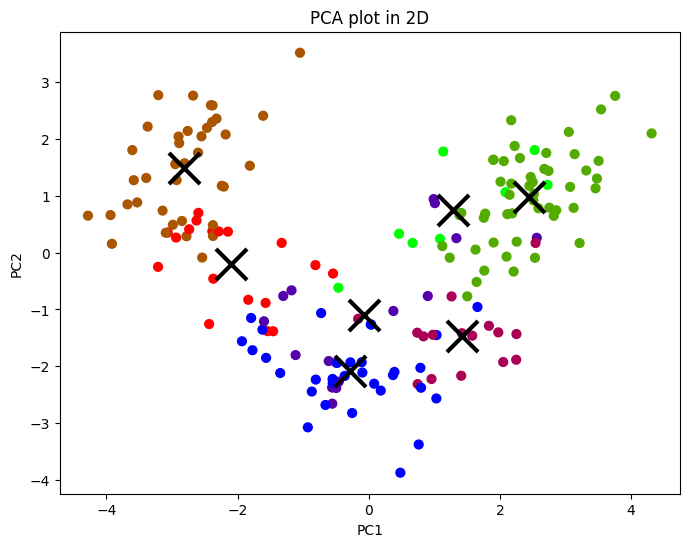

In [ ]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
print("Отделимость:\n", pairwise_distances(centroids))
print("Матрица расстояний между центроидами кластеров:\n", euclidean_distances(centroids))
print(f"Внутрикластерное расстояние: {kmeans.inertia_}")
print(f"Компактность кластеров: {davies_bouldin_score(X, clusters)}")
print(f"ARI: {adjusted_rand_score(y.values.ravel(), clusters)}")
print(f"Наполненность кластеров: {np.bincount(clusters)}")
print(f"Силуэтный коэффициент: {silhouette_score(X, clusters)}")

Отделимость:
 [[0.         2.72588869 2.51177638 3.00088882 4.41462952 4.1420342
  3.89710122]
 [2.72588869 0.         3.11035602 3.7798316  4.38269747 4.06278189
  4.00092905]
 [2.51177638 3.11035602 0.         4.31401074 5.34393372 3.30070474
  3.13847947]
 [3.00088882 3.7798316  4.31401074 0.         2.43621291 4.85067469
  4.45190986]
 [4.41462952 4.38269747 5.34393372 2.43621291 0.         5.33080349
  4.61698707]
 [4.1420342  4.06278189 3.30070474 4.85067469 5.33080349 0.
  2.54413369]
 [3.89710122 4.00092905 3.13847947 4.45190986 4.61698707 2.54413369
  0.        ]]
Матрица расстояний между центроидами кластеров:
 [[0.         2.72588869 2.51177638 3.00088882 4.41462952 4.1420342
  3.89710122]
 [2.72588869 0.         3.11035602 3.7798316  4.38269747 4.06278189
  4.00092905]
 [2.51177638 3.11035602 0.         4.31401074 5.34393372 3.30070474
  3.13847947]
 [3.00088882 3.7798316  4.31401074 0.         2.43621291 4.85067469
  4.45190986]
 [4.41462952 4.38269747 5.34393372 2.4362129